<ipython-input-2-1ca38592c9f1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_removed['MA_Smoothed'] = df_iqr_removed['Value'].rolling(window=5).mean()
<ipython-input-2-1ca38592c9f1>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_removed['Exp_Smoothed'] = df_iqr_removed['Value'].ewm(alpha=0.3).mean()


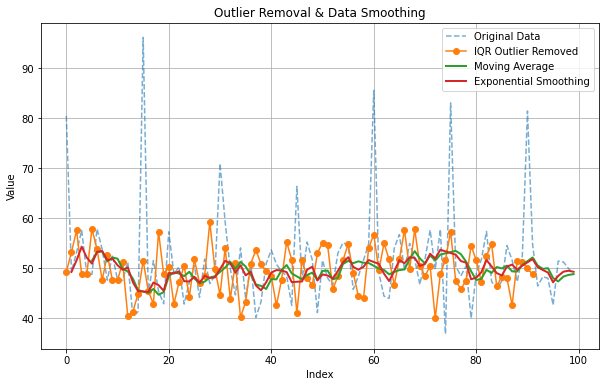

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
data = np.random.normal(loc=50, scale=5, size=100)  # Generate normal distributed data
data[::15] += np.random.randint(20, 50, size=len(data[::15]))  # Inject some artificial outliers

df = pd.DataFrame({'Value': data})

# Z-score method
z_scores = np.abs(stats.zscore(df['Value']))
threshold = 3
df_z_removed = df[z_scores < threshold]

# IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_removed = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Moving Average (window size = 5)
df_iqr_removed['MA_Smoothed'] = df_iqr_removed['Value'].rolling(window=5).mean()

# Exponential Smoothing (alpha = 0.3)
df_iqr_removed['Exp_Smoothed'] = df_iqr_removed['Value'].ewm(alpha=0.3).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data', linestyle='--', alpha=0.6)
plt.plot(df_iqr_removed['Value'].values, label='IQR Outlier Removed', marker='o')
plt.plot(df_iqr_removed['MA_Smoothed'], label='Moving Average', linewidth=2)
plt.plot(df_iqr_removed['Exp_Smoothed'], label='Exponential Smoothing', linewidth=2)

plt.title('Outlier Removal & Data Smoothing')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
